In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
a=pd.read_csv('/content/Wine.csv')
a
X= a.drop("Customer_Segment",axis=1)
y=a["Customer_Segment"]
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_original = SVC()
svm_original.fit(X_train, y_train)

# Evaluate the accuracy of the SVM classifier
y_pred_original = svm_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print("Accuracy before PCA:", accuracy_original)

# PCA to reduce the dimension
n_components = 2

pca = PCA(n_components=n_components)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
print(X_train_reduced.shape)
print(X_test_reduced.shape)

# Train an SVM classifier on the reduced data
svm_reduced = SVC()
svm_reduced.fit(X_train_reduced, y_train)

#  Evaluate the accuracy of the SVM classifier on the reduced testing data
y_pred_reduced = svm_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print("Accuracy after PCA:", accuracy_reduced)

Accuracy before PCA: 0.8055555555555556
(142, 2)
(36, 2)
Accuracy after PCA: 0.7777777777777778


Logistic Regression Accuracy: 0.7142857142857143
SVM Accuracy: 0.7142857142857143
[0.68, 0.72, 0.7, 0.76, 0.78, 0.82, 0.9, 0.72, 0.72, 0.76, 0.82, 0.76, 0.76, 0.74, 0.76, 0.62, 0.7, 0.88, 0.68, 0.78, 0.68, 0.66, 0.68, 0.7, 0.7, 0.76, 0.76, 0.7, 0.76, 0.66, 0.78, 0.68, 0.66, 0.8, 0.64, 0.66, 0.74, 0.72, 0.74, 0.76, 0.74, 0.74, 0.8, 0.76, 0.7, 0.7, 0.76, 0.66, 0.68, 0.7, 0.66, 0.64, 0.66, 0.72, 0.84, 0.76, 0.64, 0.86, 0.7, 0.66, 0.66, 0.72, 0.8, 0.7, 0.62, 0.62, 0.64, 0.76, 0.78, 0.6, 0.66, 0.68, 0.8, 0.8, 0.68, 0.82, 0.78, 0.66, 0.76, 0.74, 0.7, 0.72, 0.7, 0.7, 0.74, 0.66, 0.74, 0.82, 0.7, 0.7, 0.68, 0.66, 0.7, 0.72, 0.6, 0.62, 0.66, 0.76, 0.72, 0.68]


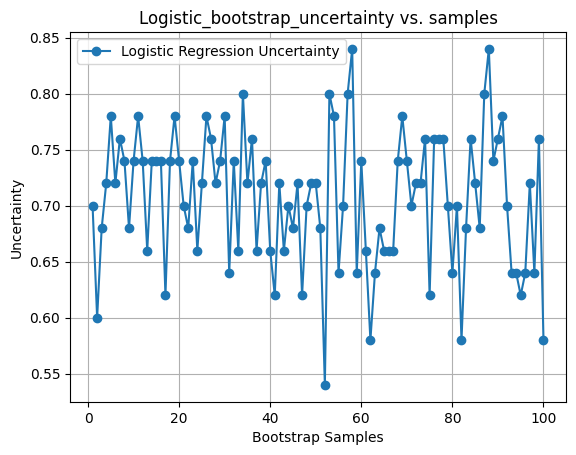

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt



data = pd.read_csv('/content/breast_cancer_survival (1).csv')



drop_columns = ["Gender", "Histology", "ER status", "PR status", "Surgery_type", "Date_of_Surgery", "Date_of_Last_Visit"]
data = data.drop(columns=drop_columns)



data['modified_Tumour_Stage'] = data['Tumour_Stage'].map({'I': 1, 'II': 2}).fillna(3)
data['mod_Patient_Status'] = (data['Patient_Status'] == 'Alive').astype(int)
data['modified_HER2_status'] = (data['HER2 status'] == 'Positive').astype(int)



X = data.drop(['Tumour_Stage', 'Patient_Status', 'mod_Patient_Status', 'HER2 status'], axis=1)
y = data['mod_Patient_Status']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)



logistic_model = LogisticRegression().fit(X_train, y_train)
svm_model = SVC().fit(X_train, y_train)



accuracy_logistic = accuracy_score(y_test, logistic_model.predict(X_test))
accuracy_svm = accuracy_score(y_test, svm_model.predict(X_test))



print("Logistic Regression Accuracy:", accuracy_logistic)
print("SVM Accuracy:", accuracy_svm)

print(logistic_bootstrap_uncertainty)
n_bootstraps = 100
sample_sizes = range(1, 51)


logistic_uncertainty = []
svm_uncertainty = []

for size in sample_sizes:
    logistic_bootstrap_uncertainty = []
    svm_bootstrap_uncertainty = []
    for _ in range(n_bootstraps):

        bootstrap_indices = np.random.choice(len(y_test), size, replace=True)
        X_bootstrap = X_test.iloc[bootstrap_indices]
        y_bootstrap = y_test.iloc[bootstrap_indices]


        logistic_pred = logistic_model.predict(X_bootstrap)
        svm_pred = svm_model.predict(X_bootstrap)


        logistic_accuracy = accuracy_score(y_bootstrap, logistic_pred)
        svm_accuracy = accuracy_score(y_bootstrap, svm_pred)

        logistic_bootstrap_uncertainty.append(logistic_accuracy)
        svm_bootstrap_uncertainty.append(svm_accuracy)

sample_indices = range(1, n_bootstraps + 1)


plt.plot(sample_indices, logistic_bootstrap_uncertainty, label='Logistic Regression Uncertainty', marker='o')

plt.xlabel('Bootstrap Samples')
plt.ylabel('Uncertainty')
plt.title('Logistic_bootstrap_uncertainty vs. samples')
plt.legend()
plt.grid(True)

plt.show()